In [1]:
import pymc as pm
import arviz as az

import numpy as np

%config InlineBackend.figure_format = "svg"

In [2]:
# keys: 112 major, 36 minor. The order doesn't matter
keys = np.zeros(148)
keys[:112] = 1
keys

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
with pm.Model() as model:
    theta = pm.Uniform("theta", 0, 1)
    pm.Bernoulli("keys", p=theta, observed=keys)

In [4]:
with model:
    idata = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'theta'}>

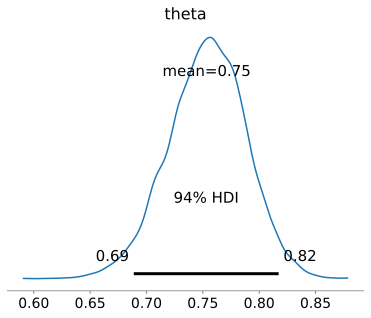

In [5]:
az.plot_posterior(idata)

In [6]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [7]:
idata.posterior["theta"].to_numpy()

array([[0.7613446 , 0.77685073, 0.77685073, ..., 0.72507481, 0.72507481,
        0.74709948],
       [0.72421356, 0.71156015, 0.74004086, ..., 0.81857696, 0.75538619,
        0.72511244]])